读取电子游戏销售数据，导入所需库


In [243]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn import ensemble
os.chdir("C:\\Users\\acer_pc\\Downloads\\284_618_bundle_archive")
data = pd.read_csv("vgsales.csv")
data = data.dropna()
data.loc[data.Genre=='Role-Playing','Genre'] = 'Role_Playing'


1.电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等

受欢迎的游戏：按全球销量排序，可找出受欢迎的游戏排行：

In [173]:
df = data.copy()
df.sort_values(by='Global_Sales')
df.head(50)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role_Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


受欢迎的类型： 
首先分别按类型将数据集划分为多个子数据集。结果显示共有12个不同类别，在这里展示了Sports类别的子数据集

In [138]:
Genres = df['Genre'].unique() 
print(Genres)
Genres_split = []
for temp_G in Genres:
    temp_data = df[df['Genre'].isin([temp_G])]
    exec("df_%s = temp_data" %temp_G)
    Genres_split.append(temp_data)
df_Sports

['Sports' 'Platform' 'Racing' 'Role_Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


然后计算每一类型的销售总额，并将其可视化。从可视化结果可以看出最受欢迎的游戏类别是Actions

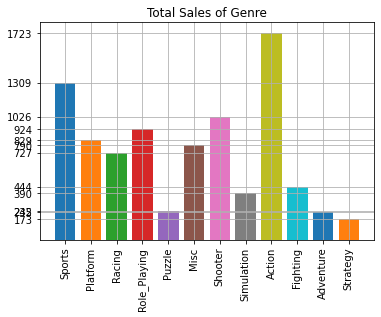

In [139]:
sale_of_genre = {}
for sub_df in Genres_split:
    global_sale = np.sum(sub_df.Global_Sales)
    Genre_name = sub_df['Genre'].to_list()[0]
    sale_of_genre[Genre_name]=global_sale
# print(sale_of_genre)
keys = list(sale_of_genre.keys())
values = list(sale_of_genre.values())
# print(keys)
# print(values)
# plt.bar(keys,values)
for i,key in enumerate(sale_of_genre):
    plt.bar(i,sale_of_genre[key])
plt.xticks(np.arange(len(values)),keys,rotation=90)
plt.yticks(values)  
plt.grid('on')
plt.title('Total Sales of Genre')
plt.show()

受欢迎的游戏平台：
和之前操作类似，按照游戏平台将数据划分为多个子集。这里展示PS4平台的数据子集：

In [140]:
Platforms = df['Platform'].unique() #sort_values(by=['Genre','Global_Sales'],ascending=False)
print(Platforms)
Platforms_split = []
for temp_G in Platforms:
    temp_data = df[df['Platform'].isin([temp_G])]
    exec("df_%s = temp_data" %temp_G)
    Platforms_split.append(temp_data)
df_PS4

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
...,...,...,...,...,...,...,...,...,...,...,...
16220,16223,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16260,16263,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
16333,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16550,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


可视化各个平台的销售总额，可发现PS2平台最受欢迎。

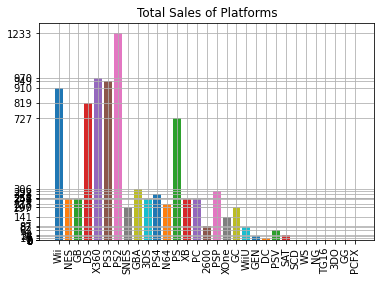

In [141]:
sale_of_platform = {}
for sub_df in Platforms_split:
    global_sale = np.sum(sub_df.Global_Sales)
    platform_name = sub_df['Platform'].to_list()[0]
    sale_of_platform[platform_name]=global_sale
# print(sale_of_genre)
keys = list(sale_of_platform.keys())
values = list(sale_of_platform.values())

for i,key in enumerate(sale_of_platform):
    plt.bar(i,sale_of_platform[key])
plt.xticks(np.arange(len(values)),keys,rotation=90)
plt.yticks(values)  
plt.grid('on')
plt.title('Total Sales of Platforms')
plt.show()

受欢迎的发布者：
和之前操作类似，按照不同发布者将数据集划分为多个子集。不同的发布者数量较多，这里不单独展示了。

In [156]:
Publishers = df['Publisher'].unique() #sort_values(by=['Genre','Global_Sales'],ascending=False)
print(Publishers)
Publishers_split = []
for idx,temp_G in enumerate(Publishers):
    temp_data = df[df['Publisher'].isin([temp_G])]

    exec("df_%d = temp_data" %idx)
    Publishers_split.append(temp_data)
# idx = Publishers.tolist().index('Nintendo')
# exec('print(df_%d)' %idx)

['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena Entertainment' 'Midway Games' 'JVC'
 'Deep Silver' '989 Studios' 'NCSoft' 'UEP Systems' 'Parker Bros.' 'Maxis'
 'Imagic' 'Tecmo Koei' 'Valve Software' 'ASCII Entertainment' 'Mindscape'
 'Infogrames' 'Unknown' 'Square' 'Valve' 'Activision Value' 'Banpresto'
 'D3Publisher' 'Oxygen Interactive' 'Red Storm Entertainment'
 

由于发布者数量过多，因此只将销售总额排名靠前的发布者信息进行可视化。结果显示：任天堂不愧是世界的主宰

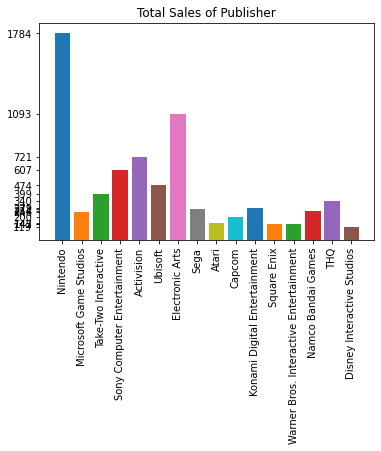

In [167]:
sale_of_publisher = {}
for sub_df in Publishers_split:
    global_sale = np.sum(sub_df.Global_Sales)
    if global_sale>100:
        publisher_name = sub_df['Publisher'].to_list()[0]
        sale_of_publisher[publisher_name]=global_sale

keys = list(sale_of_publisher.keys())
values = list(sale_of_publisher.values())

for i,key in enumerate(sale_of_publisher):
    plt.bar(i,sale_of_publisher[key])
plt.xticks(np.arange(len(values)),keys,rotation=90)
plt.yticks(values)  
# plt.grid('off')
plt.title('Total Sales of Publisher')
plt.show()

2.预测每年电子游戏销售额：
首先依然是按照年份划分子集，可以看到年份是从1980到2020（缺少2018，2019）

In [174]:
df = df.sort_values(by='Year')
years = df['Year'].unique() #sort_values(by=['Genre','Global_Sales'],ascending=False)
print(years)
years_split = []
for idx,temp_G in enumerate(years):
    temp_data = df[df['Year'].isin([temp_G])]

    exec("df_%d = temp_data" %temp_G)
    years_split.append(temp_data)
# idx = Publishers.tolist().index('Nintendo')
# print(df_2015)


[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016. 2017. 2020.]


可视化各年的所有游戏总销量：

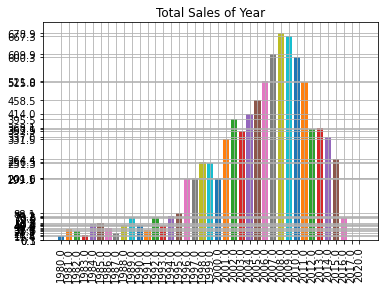

In [175]:
sale_of_year = {}
for sub_df in years_split:
    global_sale = np.sum(sub_df.Global_Sales)
    year_name = sub_df['Year'].to_list()[0]
    sale_of_year[year_name]=global_sale
# print(sale_of_genre)
keys = list(sale_of_year.keys())
values = list(sale_of_year.values())

for i,key in enumerate(sale_of_year):
    plt.bar(i,sale_of_year[key])
plt.xticks(np.arange(len(values)),keys,rotation=90)
plt.yticks(values)  
plt.grid('on')
plt.title('Total Sales of Year')
plt.show()

下面对每年的电子游戏销售额进行回归与预测。这里分别使用线性Logistic模型和AdaBoost模型进行回归与预测。
回归模型的输入x为年份，输出y为总销售额
分别计算两个回归模型的拟合误差

In [251]:
list_ = list(zip(keys,values))
df_years_sales = pd.DataFrame(list_,columns=['Year','Sales'])
# df_years_sales.info()
# print(list_)
x = df_years_sales[['Year']].astype('int')
y = df_years_sales['Sales'].astype('int')
lr=LR()
ada = ensemble.AdaBoostRegressor(n_estimators=30)
ada.fit(x,y)
lr.fit(x,y)
# print("train complete")
# print("correction rate:"+str(r2.score(x,y)))
score = lr.score(x,y)
predictions = lr.predict(x)
error = predictions - y
mae = abs(error).mean()
print("mae_logistic = %d"%mae)

score_ada = ada.score(x,y)
predictions_ada = ada.predict(x)
error_ada = predictions_ada - y
mae_ada = abs(error_ada).mean()
print("mae_adaboost = %d"%mae_ada)

mae_logistic = 225
mae_adaboost = 21


从误差来看，线性回归模型误差较大，而adaboost模型误差较小。
下面将预测结果进行可视化，可发现logistic模型不适用于此问题的回归分析，而adaboost对原数据的拟合度较高。

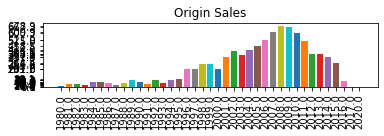

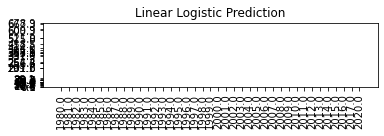

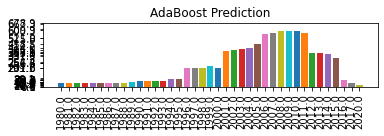

In [247]:
plt.subplot(311)
for i,key in enumerate(y.to_list()):
    plt.bar(i,key)
plt.xticks(np.arange(len(y)),df_years_sales['Year'].to_list(),rotation=90)
plt.yticks(values)  
# plt.grid('on')
plt.title('Origin Sales')
plt.show()

plt.subplot(312)
for i,key in enumerate(predictions):
    plt.bar(i,key)
plt.xticks(np.arange(len(y)),df_years_sales['Year'].to_list(),rotation=90)
plt.yticks(values)  
# plt.grid('on')
plt.title('Linear Logistic Prediction')
plt.show()

plt.subplot(313)
for i,key in enumerate(predictions_ada):
    plt.bar(i,key)
plt.xticks(np.arange(len(y)),df_years_sales['Year'].to_list(),rotation=90)
plt.yticks(values)  
# plt.grid('on')
plt.title('AdaBoost Prediction')
plt.show()

下面分别用两种拟合的模型来预测原数据中缺少的2018年和2019年的销量：

In [248]:
print(lr.predict([[2018]]))
print(ada.predict([[2018]]))

[0]
[35.]


In [249]:
print(lr.predict([[2019]]))
print(ada.predict([[2019]]))

[0]
[23.33333333]


可以看出Logistic预测失效，而Adaboost预测出了较为可信的结果。

总体结论：
从销售总额来看，1980年至2020年的年销量呈现类正态分布趋势，最高销量年份为2009年。
在此期间，最受欢迎的游戏为任天堂于2006年发行的Wii Sports；
人们普遍倾向于PS系列平台，以及DS，X360，Wii等平台；
任天堂是众多游戏发行商的一枝独秀，其总销量难以被超越。